In [1]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
import json
from PIL import ImageColor
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import pandas as pd

In [15]:
Original = r'C:\Users\Usuari\Documents\TFM_Codigos\DATASET\IMAGENES\030.tif'
Mask = r'C:\Users\Usuari\Documents\TFM_Codigos\DATASET\MASCARAS\030.tif'
MobileNetV2_Javi= r'C:\Users\Usuari\Documents\TFM_Codigos\DATASET\ImagenesTest_TFM\FCN_MObileNETV2_NOBN_030.tif'
ResNet50_Javi = r'C:\Users\Usuari\Documents\TFM_Codigos\DATASET\ImagenesTest_TFM\ResNet50_030.tif'
UNet30_Javi= r'C:\Users\Usuari\Documents\TFM_Codigos\DATASET\ImagenesTest_TFM\Unet_v0_030.tif'
UNet50_Javi = r'C:\Users\Usuari\Documents\TFM_Codigos\DATASET\ImagenesTest_TFM\Unet_v1_030.tif'
DeeplabV3_Javi = r'C:\Users\Usuari\Documents\TFM_Codigos\DATASET\ImagenesTest_TFM\DL3_030.tif'

colores_dir = r'C:\Users\Usuari\Documents\TFM_Codigos\MODELO\data/7Labels.json'

In [16]:
#Localización del data: JSON de clases con paleta de colores, imagen original y su máscara.
colores_dir = r'C:\Users\Usuari\Documents\TFM_Codigos\MODELO\data/7Labels.json'
colores = json.load(open(colores_dir))
colores_df = pd.DataFrame(colores)
colores_df["values_normalize"] = colores_df.index
colores_df["palette"] = "#" + colores_df["palette"]
values = colores_df["values"].to_list()
values_norm = colores_df["values_normalize"].to_list()
palette = colores_df["palette"].to_list()
labels = colores_df["label"].to_list()
dict_values = {}
dict_label = {}
dict_palette = {}
dict_palette_hex = {}
for x in range(0, len(values)):
    dict_values[values[x]] = values_norm[x]
    dict_label[values_norm[x]] = labels[x]
    dict_palette[values_norm[x]] = ImageColor.getrgb(palette[x])
    dict_palette_hex[values_norm[x]] = palette[x]
cmap = ListedColormap(palette)
patches = [
    mpatches.Patch(color=palette[i], label=labels[i]) for i in range(len(values))
]
legend = {
    "handles": patches,
    "bbox_to_anchor": (1.05, 1),
    "loc": 2,
    "borderaxespad": 0.0,
}
colores_df

palette  values            label  values_normalize
0  #009150       0          Arboles                 0
1  #90EE90       1       Sotobosque                 1
2  #FFFF00       2           Tierra                 2
3  #666666       3  Infraestructura                 3
4  #000000       4           Sombra                 4
5  #0000FF       5             Agua                 5
6  #FF0033       6   No Clasificado                 6

Normalized bands
0.0 - 1.0 mean: 0.3159925691015277
0.0 - 1.0 mean: 0.368841516757277
0.0 - 1.0 mean: 0.30839347222979147


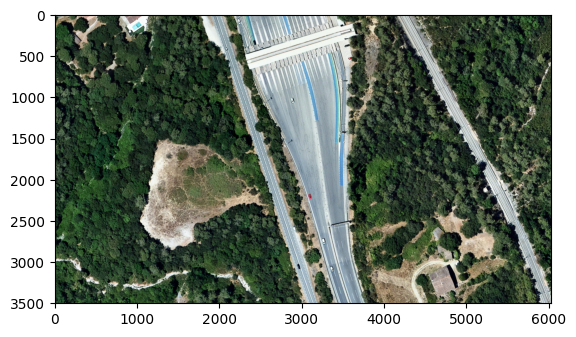

In [17]:
image = rio.open(Original)
red = image.read(1) /1000
green = image.read(2) /1000
blue = image.read(3) /1000

def normalize(array):
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

print("Normalized bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())
rgb = np.dstack((redn, greenn, bluen))
plt.imshow(rgb)

c:\Users\Usuari\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


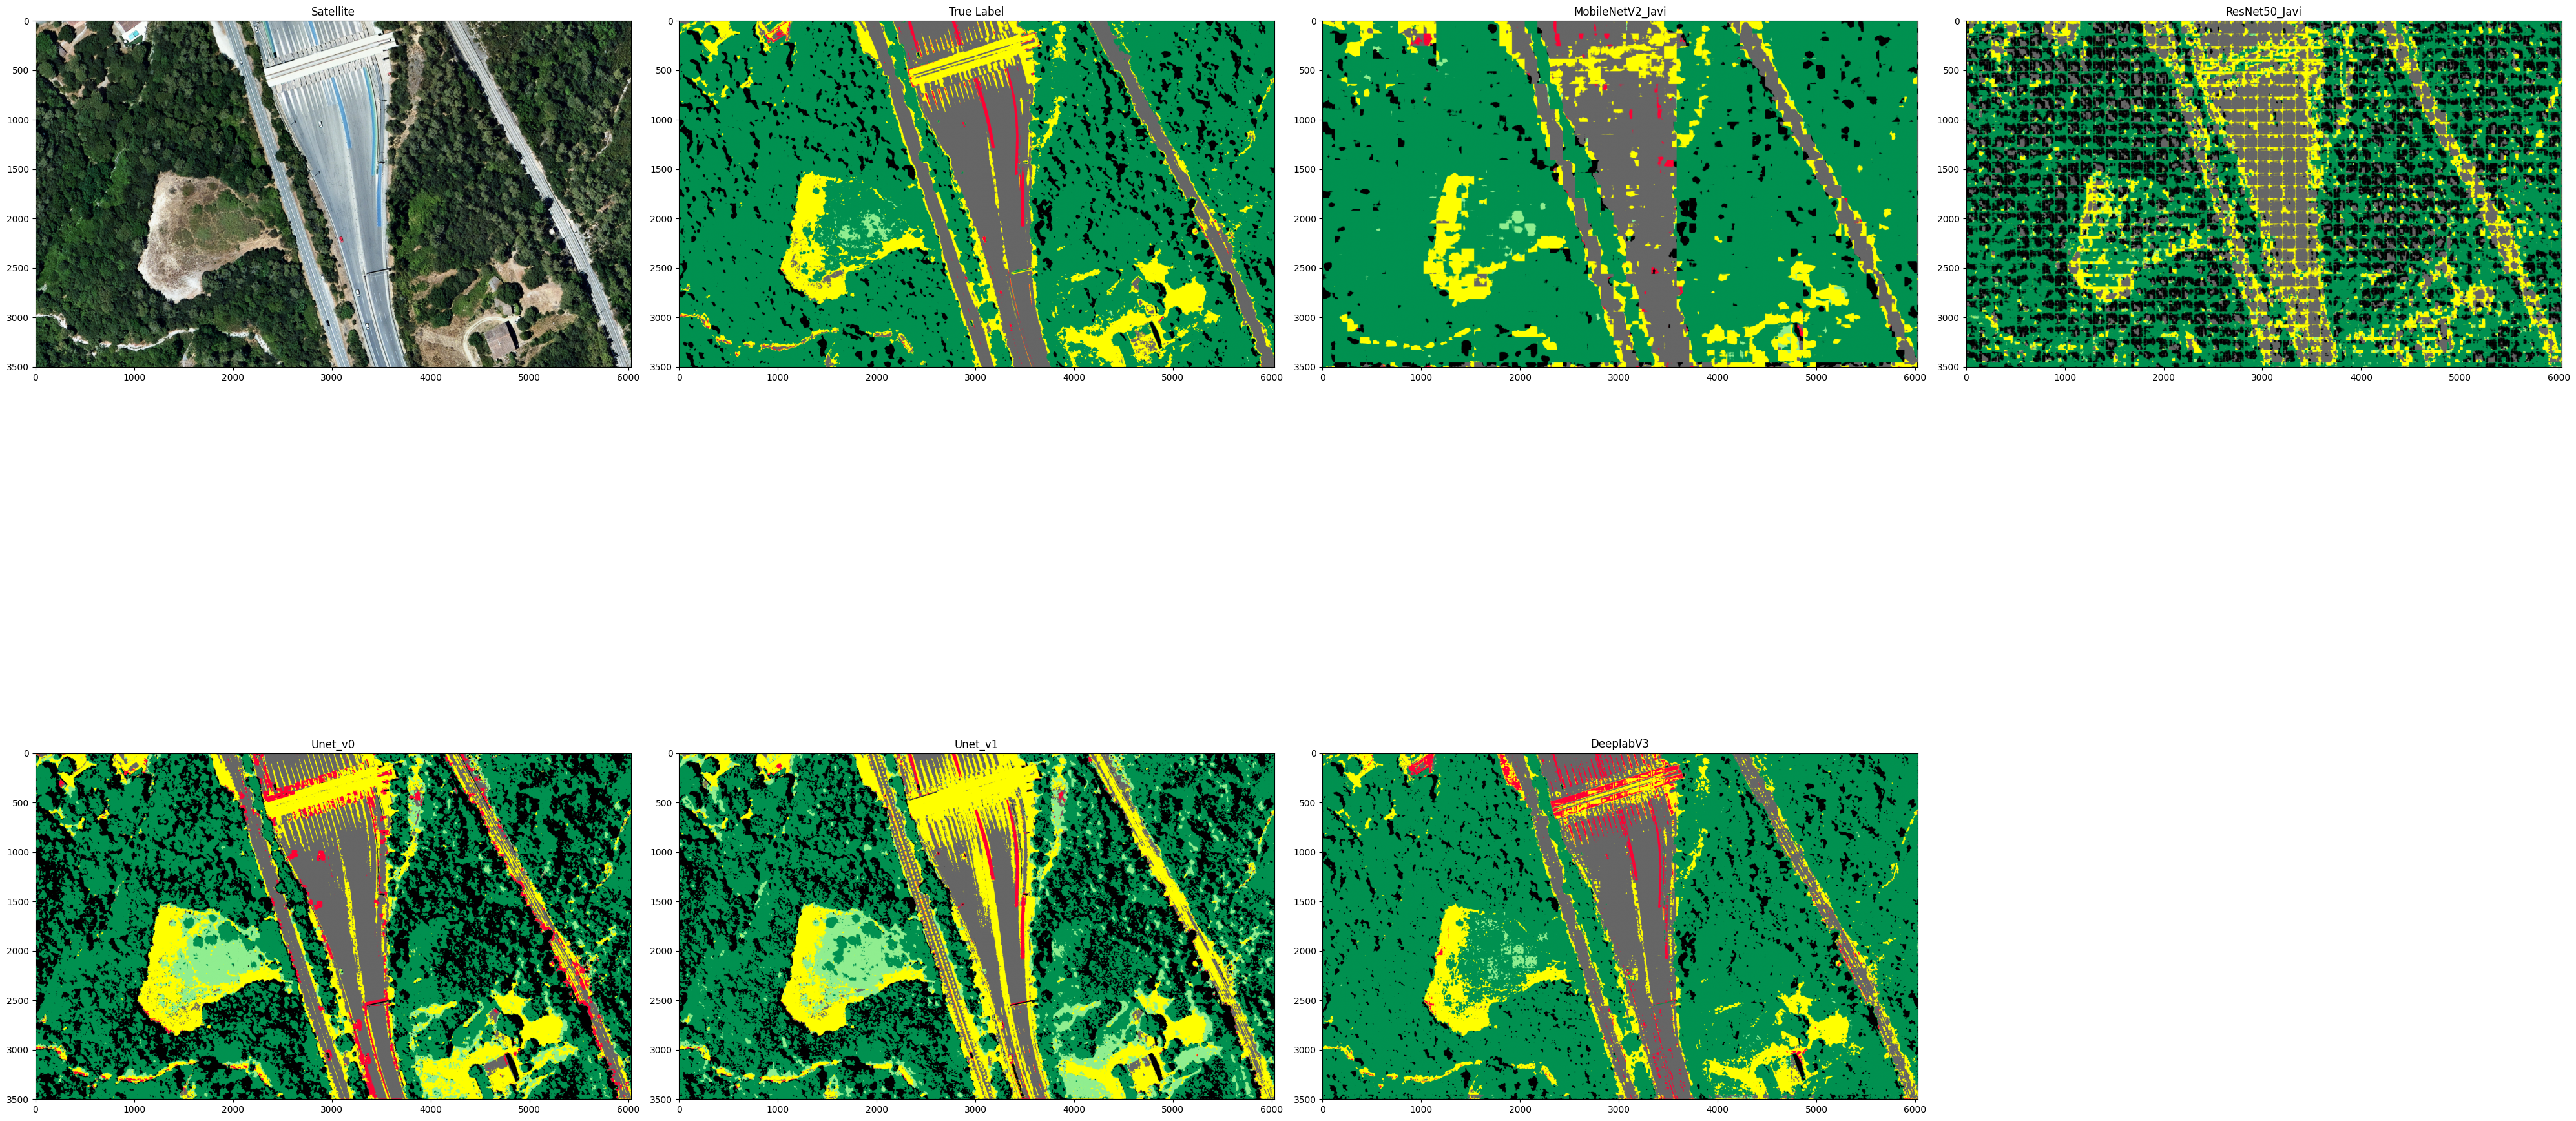

In [ ]:
plt.figure(figsize=(40, 25))
plt.subplot(2, 4, 1)
plt.title('Imagen Original')
plt.imshow(rgb)

mask_image = rio.open(Mask).read(1)
plt.subplot(2, 4, 2)
plt.title('Máscara de Validación')
plt.imshow(mask_image, cmap=cmap)

mobilenet_image = rio.open(MobileNetV2_Javi).read(1)
plt.subplot(2, 4, 3)
plt.title('MobileNetV2_Javi')
plt.imshow(mobilenet_image, cmap=cmap)

resnet50_image = rio.open(ResNet50_Javi).read(1)
plt.subplot(2, 4, 4)
plt.title('ResNet50_Javi')
plt.imshow(resnet50_image, cmap=cmap, vmin=0, vmax=6)

unet_v0_image = rio.open(UNet30_Javi).read(1)
plt.subplot(2, 4, 5)
plt.title('Unet_v0')
plt.imshow(unet_v0_image, cmap=cmap)

unet_v1_image = rio.open(UNet50_Javi).read(1)
plt.subplot(2, 4, 6)
plt.title('Unet_v1')
plt.imshow(unet_v1_image, cmap=cmap)

deeplabv3_image = rio.open(DeeplabV3_Javi).read(1)
plt.subplot(2, 4, 7)
plt.title('DeeplabV3')
plt.imshow(deeplabv3_image, cmap=cmap)

plt.tight_layout()
plt.show()